# LIVE1 - Entendendo os Dados do Mundo

## O que é o IDHM

Links importantes<br/>
https://www.undp.org/pt/brazil/o-que-%C3%A9-o-idhm<br/>
Base de dados Ipea<br/>
https://www.ipea.gov.br/ipeageo/arquivos/bases/IDH_2010.xls

O Índice de Desenvolvimento Humano Municipal (IDHM) é uma medida composta de indicadores de três dimensões do desenvolvimento humano: longevidade, educação e renda. O índice varia de 0 a 1. Quanto mais próximo de 1, maior o desenvolvimento humano.

O IDHM brasileiro segue as mesmas três dimensões do IDH Global - longevidade, educação e renda, mas vai além: adequa a metodologia global ao contexto brasileiro e à disponibilidade de indicadores nacionais. Embora meçam os mesmos fenômenos, os indicadores levados em conta no IDHM são mais adequados para avaliar o desenvolvimento dos municípios brasileiros. Assim, o IDHM - incluindo seus três componentes, IDHM Longevidade, IDHM Educação e IDHM Renda - conta um pouco da história dos municípios em três importantes dimensões do desenvolvimento humano durantes duas décadas da história brasileira.

In [152]:
import xlrd

import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## PERGUNTA NORTEADORA
Quais são os estados / municípios com o maior IDHM, e como é a distribuição desse IDHM?

In [153]:
url = "../dados/IDH_2010.xls"
df_idhm = pd.read_excel(url)

In [154]:
df_idhm.head()

,ANO,Código da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Município,Esperança de vida ao nascer,Taxa de fecundidade total,Mortalidade infantil,Mortalidade até 5 anos de idade,Razão de dependência,...,População de 15 a 17 anos.1,População de 18 anos ou mais.1,População total em domicílios particulares permanentes,"População total em domicílios particulares permanentes, exceto com renda nula",Subíndice de escolaridade - IDHM Educação,Subíndice de frequência escolar - IDHM Educação,IDHM,IDHM Educação,IDHM Longevidade,IDHM Renda
0,2010,11,Rondônia,110001,ALTA FLORESTA D'OESTE,70.75,2.24,23.8,25.49,47.37,...,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657
1,2010,11,Rondônia,110002,ARIQUEMES,73.36,1.91,19.2,20.53,46.68,...,5256,60213,89766,88730,0.514,0.648,0.702,0.600,0.806,0.716
2,2010,11,Rondônia,110003,CABIXI,70.39,2.15,24.8,26.58,48.12,...,381,4306,6303,6156,0.357,0.700,0.650,0.559,0.757,0.650
3,2010,11,Rondônia,110004,CACOAL,74.27,1.90,14.3,15.38,43.79,...,4547,54356,78141,76876,0.488,0.698,0.718,0.620,0.821,0.727
4,2010,11,Rondônia,110005,CEREJEIRAS,72.94,2.12,18.1,19.42,45.67,...,1033,11786,16942,16815,0.430,0.712,0.692,0.602,0.799,0.688


In [155]:
print(f'Tamanho de nosso Dataset: {df_idhm.shape[0]} linhas x {df_idhm.shape[1]} colunas')

Tamanho de nosso Dataset: 5564 linhas x 237 colunas


In [156]:
df_idhm.dtypes

ANO                                                  int64
Código da Unidade da Federação                       int64
Nome da Unidade da Federação                        object
Código do Município                                  int64
Município                                           object
                                                    ...   
Subíndice de frequência escolar - IDHM Educação    float64
IDHM                                               float64
IDHM Educação                                      float64
IDHM Longevidade                                   float64
IDHM Renda                                         float64
Length: 237, dtype: object

Temos dados nulos?

In [157]:
df_idhm.isnull().sum()

ANO                                                0
Código da Unidade da Federação                     0
Nome da Unidade da Federação                       0
Código do Município                                0
Município                                          0
                                                  ..
Subíndice de frequência escolar - IDHM Educação    0
IDHM                                               0
IDHM Educação                                      0
IDHM Longevidade                                   0
IDHM Renda                                         0
Length: 237, dtype: int64

In [158]:
print(f'Quantidade de dados nulos: {df_idhm.isnull().sum().sum()}')

Quantidade de dados nulos: 0


## Selecionando as colunas relevantes

In [159]:
df_idhm.columns

Index(['ANO', 'Código da Unidade da Federação', 'Nome da Unidade da Federação',
       'Código do Município', 'Município', 'Esperança de vida ao nascer',
       'Taxa de fecundidade total', 'Mortalidade infantil',
       'Mortalidade até 5 anos de idade', 'Razão de dependência',
       ...
       'População de 15 a 17 anos.1', 'População de 18 anos ou mais.1',
       'População total em domicílios particulares permanentes',
       'População total em domicílios particulares permanentes, exceto com renda nula',
       'Subíndice de escolaridade - IDHM Educação',
       'Subíndice de frequência escolar - IDHM Educação', 'IDHM',
       'IDHM Educação', 'IDHM Longevidade', 'IDHM Renda'],
      dtype='object', length=237)

In [160]:
colunas = ['Nome da Unidade da Federação', 'Município', 'IDHM', 'IDHM Educação', 'IDHM Longevidade', 'IDHM Renda']

In [161]:
df_idhm = df_idhm[colunas]
df_idhm.head()

,Nome da Unidade da Federação,Município,IDHM,IDHM Educação,IDHM Longevidade,IDHM Renda
0,Rondônia,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,Rondônia,ARIQUEMES,0.702,0.600,0.806,0.716
2,Rondônia,CABIXI,0.650,0.559,0.757,0.650
3,Rondônia,CACOAL,0.718,0.620,0.821,0.727
4,Rondônia,CEREJEIRAS,0.692,0.602,0.799,0.688


In [162]:
df_idhm.columns = ['UF', 'municipio','idhm','idhm_educacao','idhm_longevidade','idhm_renda']
df_idhm.head()

,UF,municipio,idhm,idhm_educacao,idhm_longevidade,idhm_renda
0,Rondônia,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,Rondônia,ARIQUEMES,0.702,0.600,0.806,0.716
2,Rondônia,CABIXI,0.650,0.559,0.757,0.650
3,Rondônia,CACOAL,0.718,0.620,0.821,0.727
4,Rondônia,CEREJEIRAS,0.692,0.602,0.799,0.688


In [163]:
df_idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564 entries, 0 to 5563
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UF                5564 non-null   object 
 1   municipio         5564 non-null   object 
 2   idhm              5564 non-null   float64
 3   idhm_educacao     5564 non-null   float64
 4   idhm_longevidade  5564 non-null   float64
 5   idhm_renda        5564 non-null   float64
dtypes: float64(4), object(2)
memory usage: 260.9+ KB


In [164]:
df_idhm.nunique()

UF                    27
municipio           5329
idhm                 349
idhm_educacao        466
idhm_longevidade     220
idhm_renda           390
dtype: int64

In [165]:
df_idhm.describe().round(2)

,idhm,idhm_educacao,idhm_longevidade,idhm_renda
count,5564.00,5564.00,5564.00,5564.00
mean,0.66,0.56,0.80,0.64
std,0.07,0.09,0.04,0.08
min,0.42,0.21,0.67,0.40
25%,0.60,0.49,0.77,0.57
50%,0.66,0.56,0.81,0.65
75%,0.72,0.63,0.84,0.71
max,0.86,0.82,0.89,0.89


## Classificando municípios
0 - 0,499 - Baixo Desenvolvimento Humano<br/>
0,5 - 0,799 - Médio Desenvolvimento Humano<br/>
0,8 - 1 - Alto Desenvolvimento Humano

In [166]:
def idhm_class(df):
    if df['idhm']>=0.8:
        return 'Alto Desenvolvimento Humano'
    elif df['idhm']>=0.5:
        return 'Médio Desenvolvimento Humano'
    else:
        return 'Baixo Desenvolvimento Humano'

In [167]:
df_idhm['class'] = df_idhm.apply(idhm_class, axis=1)
df_idhm

,UF,municipio,idhm,idhm_educacao,idhm_longevidade,idhm_renda,class
0,Rondônia,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657,Médio Desenvolvimento Humano
1,Rondônia,ARIQUEMES,0.702,0.600,0.806,0.716,Médio Desenvolvimento Humano
2,Rondônia,CABIXI,0.650,0.559,0.757,0.650,Médio Desenvolvimento Humano
3,Rondônia,CACOAL,0.718,0.620,0.821,0.727,Médio Desenvolvimento Humano
4,Rondônia,CEREJEIRAS,0.692,0.602,0.799,0.688,Médio Desenvolvimento Humano
...,...,...,...,...,...,...,...
5559,Goiás,VIANÓPOLIS,0.712,0.622,0.818,0.710,Médio Desenvolvimento Humano
5560,Goiás,VICENTINÓPOLIS,0.684,0.562,0.804,0.707,Médio Desenvolvimento Humano
5561,Goiás,VILA BOA,0.647,0.534,0.818,0.619,Médio Desenvolvimento Humano
5562,Goiás,VILA PROPÍCIO,0.634,0.505,0.802,0.629,Médio Desenvolvimento Humano


In [168]:
pd.get_dummies(df_idhm['class'])

,Alto Desenvolvimento Humano,Baixo Desenvolvimento Humano,Médio Desenvolvimento Humano
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
5559,False,False,True
5560,False,False,True
5561,False,False,True
5562,False,False,True


In [169]:
df_idhm_estado_nivel = pd.DataFrame(pd.get_dummies(df_idhm['class'],dtype=int).join(df_idhm[['UF','municipio']]))
df_idhm_estado_nivel

,Alto Desenvolvimento Humano,Baixo Desenvolvimento Humano,Médio Desenvolvimento Humano,UF,municipio
0,0,0,1,Rondônia,ALTA FLORESTA D'OESTE
1,0,0,1,Rondônia,ARIQUEMES
2,0,0,1,Rondônia,CABIXI
3,0,0,1,Rondônia,CACOAL
4,0,0,1,Rondônia,CEREJEIRAS
...,...,...,...,...,...
5559,0,0,1,Goiás,VIANÓPOLIS
5560,0,0,1,Goiás,VICENTINÓPOLIS
5561,0,0,1,Goiás,VILA BOA
5562,0,0,1,Goiás,VILA PROPÍCIO


In [170]:
df_idhm_estado_nivel.groupby('UF')[['Alto Desenvolvimento Humano', 'Médio Desenvolvimento Humano','Baixo Desenvolvimento Humano']].sum()

,Alto Desenvolvimento Humano,Médio Desenvolvimento Humano,Baixo Desenvolvimento Humano
UF,,,
Acre,0,21,1
Alagoas,0,100,2
Amapá,0,16,0
Amazonas,0,55,7
Bahia,0,416,1
Ceará,0,184,0
Distrito Federal,1,0,0
Espírito Santo,2,76,0
Goiás,0,246,0


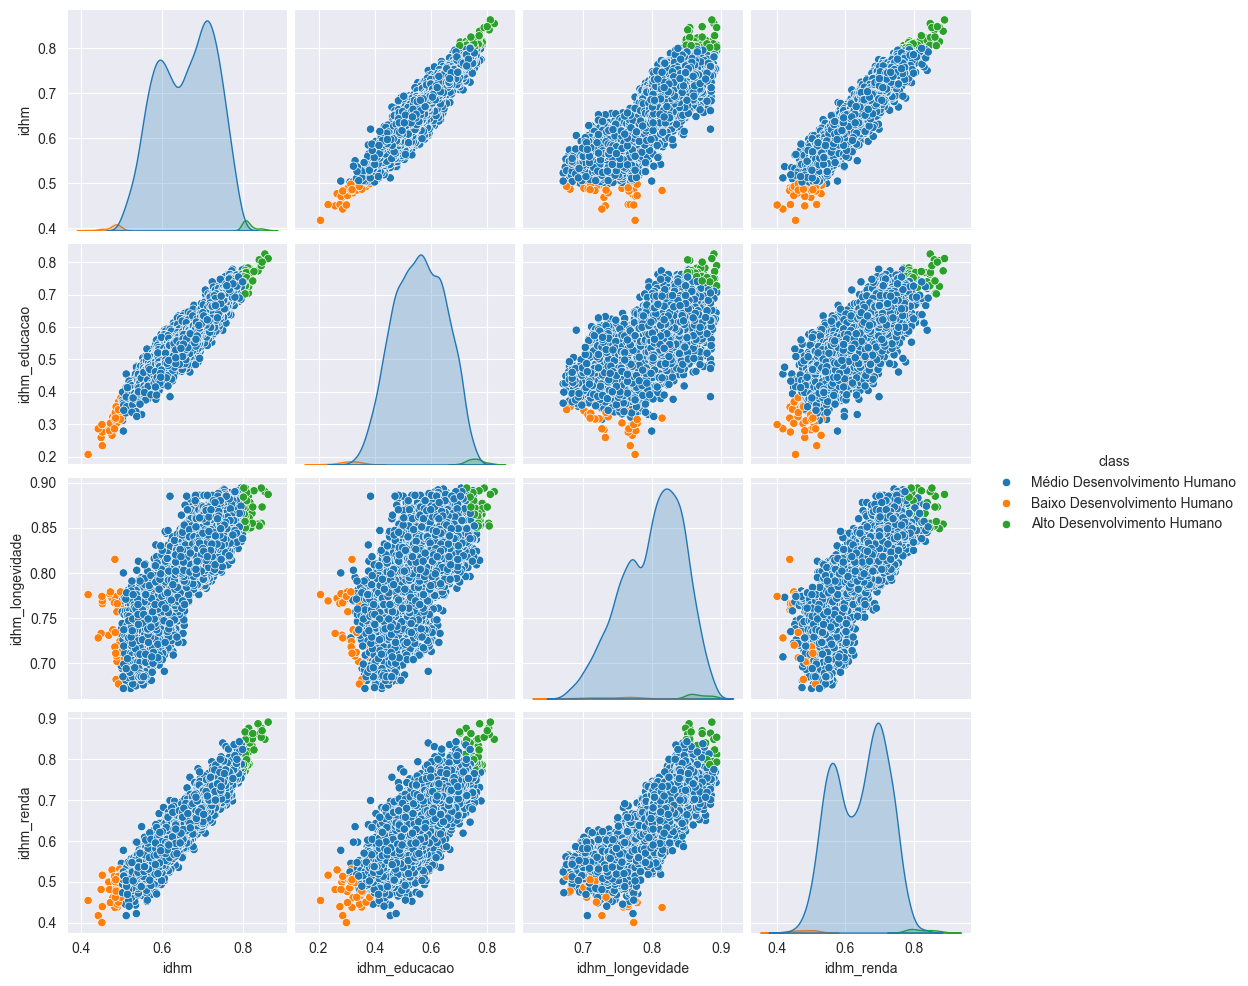

In [171]:
sns.pairplot(df_idhm, hue='class')

## Análise por estado

In [172]:
df_idhm_estado = pd.DataFrame(df_idhm.groupby(['UF'])['idhm'].mean().round(2).reset_index())

In [173]:
df_idhm_estado

,UF,idhm
0,Acre,0.59
1,Alagoas,0.56
2,Amapá,0.64
3,Amazonas,0.57
4,Bahia,0.59
5,Ceará,0.62
6,Distrito Federal,0.82
7,Espírito Santo,0.69
8,Goiás,0.69
9,Maranhão,0.58


In [174]:
df_idhm_estado['class'] = df_idhm_estado.apply(idhm_class, axis=1)

In [251]:
df_idhm_estado

,UF,idhm,class
0,Acre,0.59,Médio Desenvolvimento Humano
1,Alagoas,0.56,Médio Desenvolvimento Humano
2,Amapá,0.64,Médio Desenvolvimento Humano
3,Amazonas,0.57,Médio Desenvolvimento Humano
4,Bahia,0.59,Médio Desenvolvimento Humano
5,Ceará,0.62,Médio Desenvolvimento Humano
6,Distrito Federal,0.82,Alto Desenvolvimento Humano
7,Espírito Santo,0.69,Médio Desenvolvimento Humano
8,Goiás,0.69,Médio Desenvolvimento Humano
9,Maranhão,0.58,Médio Desenvolvimento Humano


In [252]:
df_idhm_estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UF      27 non-null     object 
 1   idhm    27 non-null     float64
 2   class   27 non-null     object 
dtypes: float64(1), object(2)
memory usage: 780.0+ bytes


Importante: Os dados abaixos não estão ponderados, estão sendo baseados na média da média dos estados e não levam população em conta.

In [253]:
df_idhm_estado.describe()

,idhm
count,27.000000
mean,0.644815
std,0.064651
min,0.560000
25%,0.590000
50%,0.640000
75%,0.690000
max,0.820000


Text(0, 0.5, 'Valores')

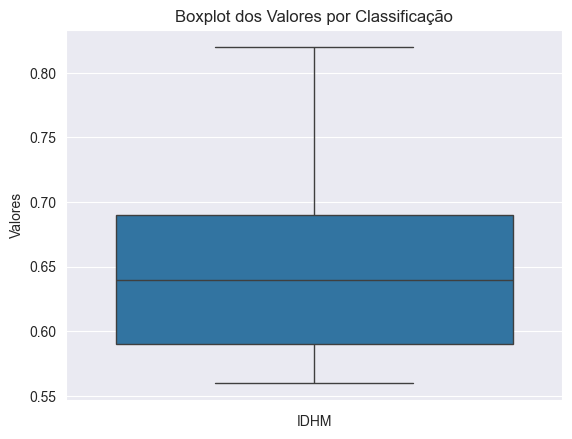

In [254]:
sns.boxplot(y=df_idhm_estado['idhm'],data=df_idhm_estado)

plt.title('Boxplot dos Valores por Classificação')
plt.xlabel('IDHM')
plt.ylabel('Valores')

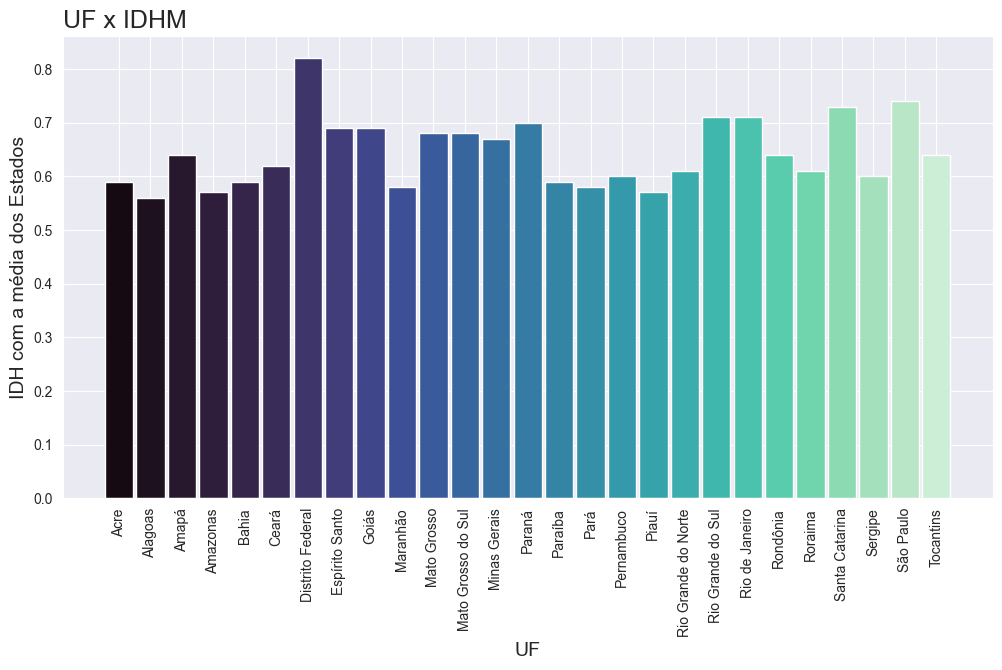

In [255]:
#Tamanho da Figura
plt.figure(figsize=(12,6))

#Paleta de Cores
Paleta_Cores = sns.color_palette('mako', len(df_idhm_estado) )
sns.set_style('darkgrid')

#Plotagem
plt.bar(df_idhm_estado['UF'],
        df_idhm_estado['idhm'],
        width=0.9,
        color = Paleta_Cores
        )

#Titulo
plt.title('UF x IDHM', loc = 'left', fontsize = 18)

#Labels
plt.xlabel('UF', fontsize = 14)
plt.ylabel('IDH com a média dos Estados', fontsize = 14)
plt.xticks(rotation = 90);

In [256]:
# Criar um gráfico de barras usando o Plotly
fig = px.bar(df_idhm_estado, x='UF', y='idhm', text='idhm', color = 'class', color_discrete_sequence=['orange','green'])


# Adicionar título e rótulos dos eixos
fig.update_layout(title='Gráfico de Barras',
                  xaxis_title='UF',
                  yaxis_title='idhm')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Usando o Plotly
fig = px.treemap(df_idhm_estado, path=['UF'], values='idhm', title='TreeMap')

# Exibir o treemap
fig.update_traces(root_color="lightgrey")



fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Desafio

* Realizar outras análises para o IDHM - 2010 e retirar outros insights.
* Utilize a consulta por Estado e analisem a composição do indicador (Eduação, Longevidade, Renda)
* Estudem sobre o indicador.

Utilizem o site
http://www.atlasbrasil.org.br/

In [321]:
url = '../dados/idhm_2021.xlsx'
df_idhm_2021 = pd.read_excel(url,skipfooter=3)
df_idhm_2021

,Territorialidades,População total em domicílios particulares permanentes 2021,IDHM Educação 2021,IDHM Longevidade 2021,IDHM Renda 2021,IDHM 2021
0,Brasil,212577217,0.757,0.819,0.724,0.766
1,Acre,889723,0.692,0.788,0.655,0.710
2,Alagoas,3358030,0.679,0.748,0.630,0.684
3,Amapá,867901,0.647,0.778,0.648,0.688
4,Amazonas,4102887,0.720,0.744,0.641,0.700
5,Bahia,14951834,0.659,0.772,0.648,0.691
6,Ceará,9231196,0.766,0.784,0.658,0.734
7,Distrito Federal,3090277,0.817,0.803,0.821,0.814
8,Espírito Santo,4104539,0.742,0.864,0.715,0.771
9,Goiás,7206333,0.778,0.721,0.714,0.737


In [322]:
df_idhm_2021.columns = [['UF','pop_total','ihdm_educacao','idhm_longevidade','idhm_renda','idhm']]
df_idhm_2021

,UF,pop_total,ihdm_educacao,idhm_longevidade,idhm_renda,idhm
0,Brasil,212577217,0.757,0.819,0.724,0.766
1,Acre,889723,0.692,0.788,0.655,0.710
2,Alagoas,3358030,0.679,0.748,0.630,0.684
3,Amapá,867901,0.647,0.778,0.648,0.688
4,Amazonas,4102887,0.720,0.744,0.641,0.700
5,Bahia,14951834,0.659,0.772,0.648,0.691
6,Ceará,9231196,0.766,0.784,0.658,0.734
7,Distrito Federal,3090277,0.817,0.803,0.821,0.814
8,Espírito Santo,4104539,0.742,0.864,0.715,0.771
9,Goiás,7206333,0.778,0.721,0.714,0.737


In [323]:
df_idhm_2021['class'] = df_idhm_2021.apply(idhm_class, axis=1)

In [324]:
df_idhm_2021

,UF,pop_total,ihdm_educacao,idhm_longevidade,idhm_renda,idhm,class
0,Brasil,212577217,0.757,0.819,0.724,0.766,Médio Desenvolvimento Humano
1,Acre,889723,0.692,0.788,0.655,0.710,Médio Desenvolvimento Humano
2,Alagoas,3358030,0.679,0.748,0.630,0.684,Médio Desenvolvimento Humano
3,Amapá,867901,0.647,0.778,0.648,0.688,Médio Desenvolvimento Humano
4,Amazonas,4102887,0.720,0.744,0.641,0.700,Médio Desenvolvimento Humano
5,Bahia,14951834,0.659,0.772,0.648,0.691,Médio Desenvolvimento Humano
6,Ceará,9231196,0.766,0.784,0.658,0.734,Médio Desenvolvimento Humano
7,Distrito Federal,3090277,0.817,0.803,0.821,0.814,Alto Desenvolvimento Humano
8,Espírito Santo,4104539,0.742,0.864,0.715,0.771,Médio Desenvolvimento Humano
9,Goiás,7206333,0.778,0.721,0.714,0.737,Médio Desenvolvimento Humano


In [325]:
df_idhm_2010 = df_idhm_estado.copy()
df_idhm_2010.columns = [x+'_2010' for x in df_idhm_2010.columns]
df_idhm_2010

,UF_2010,idhm_2010,class_2010
0,Acre,0.59,Médio Desenvolvimento Humano
1,Alagoas,0.56,Médio Desenvolvimento Humano
2,Amapá,0.64,Médio Desenvolvimento Humano
3,Amazonas,0.57,Médio Desenvolvimento Humano
4,Bahia,0.59,Médio Desenvolvimento Humano
5,Ceará,0.62,Médio Desenvolvimento Humano
6,Distrito Federal,0.82,Alto Desenvolvimento Humano
7,Espírito Santo,0.69,Médio Desenvolvimento Humano
8,Goiás,0.69,Médio Desenvolvimento Humano
9,Maranhão,0.58,Médio Desenvolvimento Humano


In [326]:
df_idhm_2021.columns = [x[0] for x in df_idhm_2021.columns]

In [327]:
df_idhm_2021.columns = [x+'_2021' for x in df_idhm_2021.columns]
df_idhm_2021

,UF_2021,pop_total_2021,ihdm_educacao_2021,idhm_longevidade_2021,idhm_renda_2021,idhm_2021,class_2021
0,Brasil,212577217,0.757,0.819,0.724,0.766,Médio Desenvolvimento Humano
1,Acre,889723,0.692,0.788,0.655,0.710,Médio Desenvolvimento Humano
2,Alagoas,3358030,0.679,0.748,0.630,0.684,Médio Desenvolvimento Humano
3,Amapá,867901,0.647,0.778,0.648,0.688,Médio Desenvolvimento Humano
4,Amazonas,4102887,0.720,0.744,0.641,0.700,Médio Desenvolvimento Humano
5,Bahia,14951834,0.659,0.772,0.648,0.691,Médio Desenvolvimento Humano
6,Ceará,9231196,0.766,0.784,0.658,0.734,Médio Desenvolvimento Humano
7,Distrito Federal,3090277,0.817,0.803,0.821,0.814,Alto Desenvolvimento Humano
8,Espírito Santo,4104539,0.742,0.864,0.715,0.771,Médio Desenvolvimento Humano
9,Goiás,7206333,0.778,0.721,0.714,0.737,Médio Desenvolvimento Humano


In [328]:
df_temp = {'UF_2010':'Brasil','pop_total_2010':np.nan,'idhm_educacao_2010':np.nan,'idhm_longevidade_2010':np.nan,'idhm_renda_2010':np.nan,'idhm_2010':np.nan,'class_2010':np.nan}
df_temp = pd.DataFrame(data=df_temp, index=[0])
df_temp

,UF_2010,pop_total_2010,idhm_educacao_2010,idhm_longevidade_2010,idhm_renda_2010,idhm_2010,class_2010
0,Brasil,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
df_idhm_2010.describe().loc['mean']['idhm_2010']

np.float64(0.6448148148148148)

In [330]:
df_temp['idhm_2010']=df_idhm_2010.describe().loc['mean']['idhm_2010']
df_temp

,UF_2010,pop_total_2010,idhm_educacao_2010,idhm_longevidade_2010,idhm_renda_2010,idhm_2010,class_2010
0,Brasil,NaN,NaN,NaN,NaN,0.644815,NaN


In [331]:
if df_temp['idhm_2010'][0]>=0.8:
    df_temp['class_2010'] = 'Alto Desenvolvimento Humano'
elif df_temp['idhm_2010'][0]>=0.5:
    df_temp['class_2010'] = 'Médio Desenvolvimento Humano'
else:
    df_temp['class_2010'] = 'Baixo Desenvolvimento Humano'
df_temp

,UF_2010,pop_total_2010,idhm_educacao_2010,idhm_longevidade_2010,idhm_renda_2010,idhm_2010,class_2010
0,Brasil,NaN,NaN,NaN,NaN,0.644815,Médio Desenvolvimento Humano


In [332]:
df_idhm_2010 = pd.concat([df_idhm_2010, df_temp],ignore_index=True)
df_idhm_2010

,UF_2010,idhm_2010,class_2010,pop_total_2010,idhm_educacao_2010,idhm_longevidade_2010,idhm_renda_2010
0,Acre,0.590000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN
1,Alagoas,0.560000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN
2,Amapá,0.640000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN
3,Amazonas,0.570000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN
4,Bahia,0.590000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN
5,Ceará,0.620000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN
6,Distrito Federal,0.820000,Alto Desenvolvimento Humano,NaN,NaN,NaN,NaN
7,Espírito Santo,0.690000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN
8,Goiás,0.690000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN
9,Maranhão,0.580000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN


In [333]:
df_idhm_2021_2010 = pd.merge(df_idhm_2010, df_idhm_2021, left_on='UF_2010', right_on='UF_2021')
df_idhm_2021_2010

,UF_2010,idhm_2010,class_2010,pop_total_2010,idhm_educacao_2010,idhm_longevidade_2010,idhm_renda_2010,UF_2021,pop_total_2021,ihdm_educacao_2021,idhm_longevidade_2021,idhm_renda_2021,idhm_2021,class_2021
0,Acre,0.590000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN,Acre,889723,0.692,0.788,0.655,0.710,Médio Desenvolvimento Humano
1,Alagoas,0.560000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN,Alagoas,3358030,0.679,0.748,0.630,0.684,Médio Desenvolvimento Humano
2,Amapá,0.640000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN,Amapá,867901,0.647,0.778,0.648,0.688,Médio Desenvolvimento Humano
3,Amazonas,0.570000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN,Amazonas,4102887,0.720,0.744,0.641,0.700,Médio Desenvolvimento Humano
4,Bahia,0.590000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN,Bahia,14951834,0.659,0.772,0.648,0.691,Médio Desenvolvimento Humano
5,Ceará,0.620000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN,Ceará,9231196,0.766,0.784,0.658,0.734,Médio Desenvolvimento Humano
6,Distrito Federal,0.820000,Alto Desenvolvimento Humano,NaN,NaN,NaN,NaN,Distrito Federal,3090277,0.817,0.803,0.821,0.814,Alto Desenvolvimento Humano
7,Espírito Santo,0.690000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN,Espírito Santo,4104539,0.742,0.864,0.715,0.771,Médio Desenvolvimento Humano
8,Goiás,0.690000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN,Goiás,7206333,0.778,0.721,0.714,0.737,Médio Desenvolvimento Humano
9,Maranhão,0.580000,Médio Desenvolvimento Humano,NaN,NaN,NaN,NaN,Maranhão,7118080,0.716,0.715,0.603,0.676,Médio Desenvolvimento Humano


In [334]:
df_idhm_2021_2010=df_idhm_2021_2010.dropna(axis=1)
df_idhm_2021_2010

,UF_2010,idhm_2010,class_2010,UF_2021,pop_total_2021,ihdm_educacao_2021,idhm_longevidade_2021,idhm_renda_2021,idhm_2021,class_2021
0,Acre,0.590000,Médio Desenvolvimento Humano,Acre,889723,0.692,0.788,0.655,0.710,Médio Desenvolvimento Humano
1,Alagoas,0.560000,Médio Desenvolvimento Humano,Alagoas,3358030,0.679,0.748,0.630,0.684,Médio Desenvolvimento Humano
2,Amapá,0.640000,Médio Desenvolvimento Humano,Amapá,867901,0.647,0.778,0.648,0.688,Médio Desenvolvimento Humano
3,Amazonas,0.570000,Médio Desenvolvimento Humano,Amazonas,4102887,0.720,0.744,0.641,0.700,Médio Desenvolvimento Humano
4,Bahia,0.590000,Médio Desenvolvimento Humano,Bahia,14951834,0.659,0.772,0.648,0.691,Médio Desenvolvimento Humano
5,Ceará,0.620000,Médio Desenvolvimento Humano,Ceará,9231196,0.766,0.784,0.658,0.734,Médio Desenvolvimento Humano
6,Distrito Federal,0.820000,Alto Desenvolvimento Humano,Distrito Federal,3090277,0.817,0.803,0.821,0.814,Alto Desenvolvimento Humano
7,Espírito Santo,0.690000,Médio Desenvolvimento Humano,Espírito Santo,4104539,0.742,0.864,0.715,0.771,Médio Desenvolvimento Humano
8,Goiás,0.690000,Médio Desenvolvimento Humano,Goiás,7206333,0.778,0.721,0.714,0.737,Médio Desenvolvimento Humano
9,Maranhão,0.580000,Médio Desenvolvimento Humano,Maranhão,7118080,0.716,0.715,0.603,0.676,Médio Desenvolvimento Humano


In [336]:
df_idhm_2021_2010 = df_idhm_2021_2010.drop('UF_2021',axis=1)
df_idhm_2021_2010 = df_idhm_2021_2010.rename(columns={'UF_2010':'UF'})

In [342]:
df_idhm_2021_2010['crescimento'] = df_idhm_2021_2010['idhm_2021'] - df_idhm_2021_2010['idhm_2010']
df_idhm_2021_2010 = df_idhm_2021_2010.drop(['ihdm_educacao_2021','idhm_longevidade_2021','idhm_renda_2021'],axis=1)
df_idhm_2021_2010

,UF,idhm_2010,class_2010,pop_total_2021,idhm_2021,class_2021,crescimento
0,Acre,0.590000,Médio Desenvolvimento Humano,889723,0.710,Médio Desenvolvimento Humano,0.120000
1,Alagoas,0.560000,Médio Desenvolvimento Humano,3358030,0.684,Médio Desenvolvimento Humano,0.124000
2,Amapá,0.640000,Médio Desenvolvimento Humano,867901,0.688,Médio Desenvolvimento Humano,0.048000
3,Amazonas,0.570000,Médio Desenvolvimento Humano,4102887,0.700,Médio Desenvolvimento Humano,0.130000
4,Bahia,0.590000,Médio Desenvolvimento Humano,14951834,0.691,Médio Desenvolvimento Humano,0.101000
5,Ceará,0.620000,Médio Desenvolvimento Humano,9231196,0.734,Médio Desenvolvimento Humano,0.114000
6,Distrito Federal,0.820000,Alto Desenvolvimento Humano,3090277,0.814,Alto Desenvolvimento Humano,-0.006000
7,Espírito Santo,0.690000,Médio Desenvolvimento Humano,4104539,0.771,Médio Desenvolvimento Humano,0.081000
8,Goiás,0.690000,Médio Desenvolvimento Humano,7206333,0.737,Médio Desenvolvimento Humano,0.047000
9,Maranhão,0.580000,Médio Desenvolvimento Humano,7118080,0.676,Médio Desenvolvimento Humano,0.096000
